<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/Logistic%20Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.arange(50)
x2 = np.random.rand(x1.size) * 50

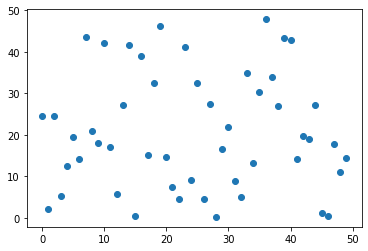

In [3]:
plt.scatter(x1, x2)

In [41]:
y = np.where(x1 - x2 >= 0, 0, 1)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [5]:
x1 - x2

array([-24.52299983,  -1.0384849 , -22.66603637,  -2.3962178 ,
        -8.53358783, -14.40473155,  -8.20420974, -36.64917816,
       -12.97587065,  -9.03253148, -32.14974392,  -6.16537673,
         6.27077195, -14.28619733, -27.7414887 ,  14.53794293,
       -22.95346881,   1.76188002, -14.53738911, -27.16070888,
         5.26583529,  13.61881962,  17.3477477 , -18.11181414,
        14.80230253,  -7.53375314,  21.55024263,  -0.54209887,
        27.7492284 ,  12.2811113 ,   8.10889913,  22.02822098,
        26.87259984,  -2.04910081,  20.75460029,   4.67859154,
       -11.88813789,   2.9109998 ,  11.04220032,  -4.32657242,
        -2.90100108,  26.88381476,  22.2358373 ,  23.99554533,
        16.76926896,  43.70264987,  45.42320913,  29.29377039,
        36.92258957,  34.60417369])

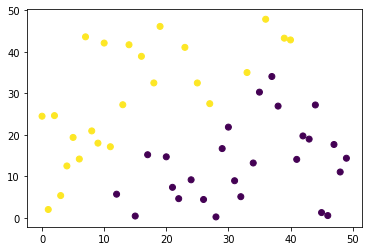

In [6]:
plt.scatter(x1, x2, c = y)

In [7]:
X = np.dstack([x1, x2])[0]
X.shape

(50, 2)

In [8]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(X, y)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


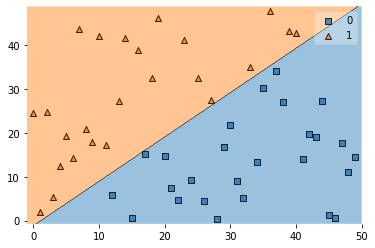

In [9]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf = logR)

In [10]:
logR.coef_

array([[-0.92650286,  0.91543198]])

In [11]:
logR.intercept_

array([1.06562907])

In [26]:
from IPython.display import clear_output

In [27]:

class CustomLogisticRegression():
  def __init__(self, learning_rate, iteration):
    self.learning_rate = learning_rate
    self.iteration = iteration

  def fit(self, X, y):
    row, col = X.shape

    self.W = np.random.rand(col)
    self.b = np.random.rand()

    for i in range(self.iteration):
      distance = X.dot(self.W) + self.b
      y_pred = self.sigmoid(distance)

      dw = (X.T).dot(y_pred - y) / row
      db = (y_pred - y).sum() / row

      self.W = self.W - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

      
      x1 = np.array([0, 50])
      x2 = -(self.W[0] * x1 - self.b)/self.W[1]
      
      clear_output(wait = True)
      plt.scatter(X[:, 0], X[:, 1], c = y)
      plt.plot(x1, x2, "r--")
      plt.title("Interation" + str(i))
      plt.show()

  def sigmoid(self, x):
    return 1 / (1 - np.exp(-x))

  def predict(self, X):
    distance = X.dot(self.W) + self.b
    probability = self.sigmoid(distance)
    return np.round(probability)

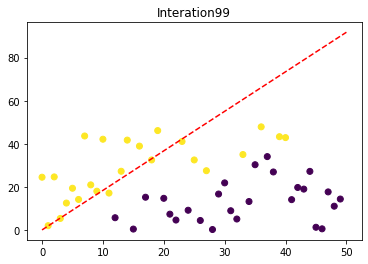

In [42]:
clogR = CustomLogisticRegression(0.01, 100)
clogR.fit(X, y)

# SoftMax

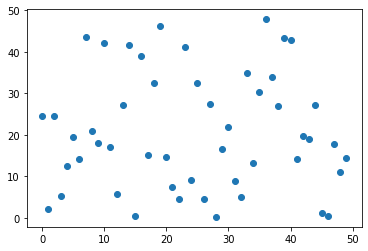

In [33]:
plt.scatter(x1, x2)

In [34]:
def get_y(x):
  if(x < 10):
    return 1
  elif(x < 30 ):
    return 2
  else:
    return 3

In [35]:
y = np.array(list(map(get_y, x1)))

In [36]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

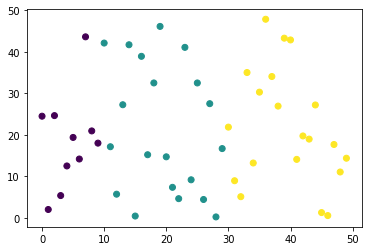

In [37]:
plt.scatter(x1, x2, c = y)

In [38]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(multi_class = "multinomial")
logR.fit(X, y)

LogisticRegression(multi_class='multinomial')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


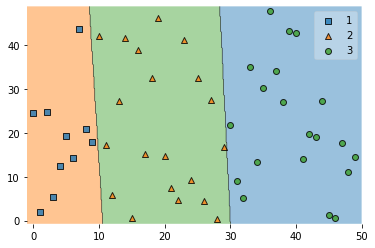

In [39]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf = logR)